* RHuebner1972/HRDatasets

https://github.com/RHuebner1972/HRDatasets

* Codebook - HR Dataset v13

Dr. Rich Huebner

9/27/2019

https://rpubs.com/rhuebner/hr_codebook_v13

# Introduction to the HR Dataset - Version 13

In [660]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
from sklearn.pipeline import make_pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from sklearn.model_selection import train_test_split
%matplotlib inline

The HR Dataset was designed by Drs. Rich Huebner and Carla Patalano to accompany a case study designed for graduate HR students studying HR metrics, measurement, and analytics. The students use Tableau data visualization software to uncover insights about the case. This is a synthetic data set created specifically to go along with the case study (proprietary for the college that we teach at).

Every year or so, we update the data set to include additional columns, and to make slight changes to the underlying data. In this version, we add several new features to the data set:

* Engagement Survey Results, a floating-point number, range between 1 and 5.
* Special Project Count, integer, which is the number of special projects the employee worked on in the last year.
* Last Performance Review Date, date, to ensure that all employees are receiving timely reviews.
* Days Late in the Last 30 days, integer, as an attendance metric.

Fields removed since last iteration

* Any derived fields such as AGE and DaysEmployed have been removed.

# Data Dictionary

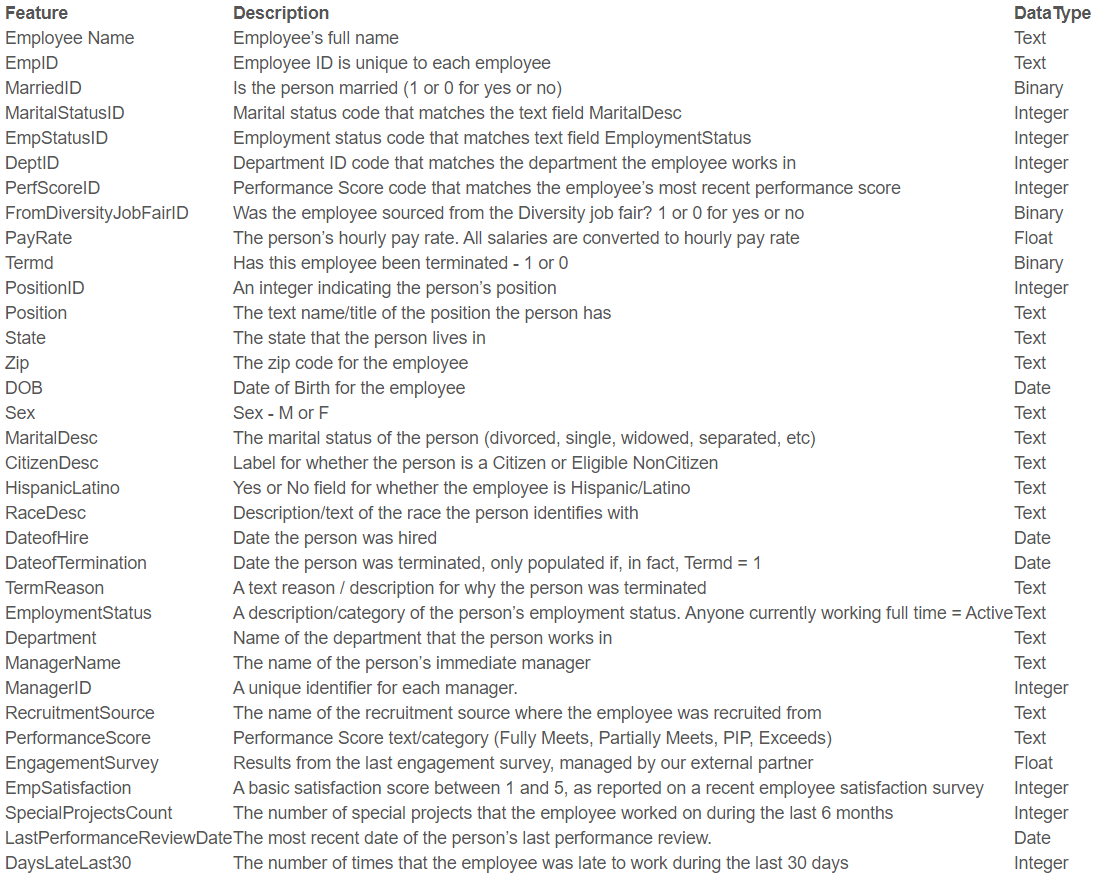

In [661]:
Image("e:/WORK/Python/Raschka/HR Dataset.png") 

# Data Processing Example using Python

Just some of the steps involved in prepping a dataset for analysis and machine learning.

Kamil Mysiak

Sep 27 · 2020

https://towardsdatascience.com/data-processing-example-using-python-bfbe6f713d9c

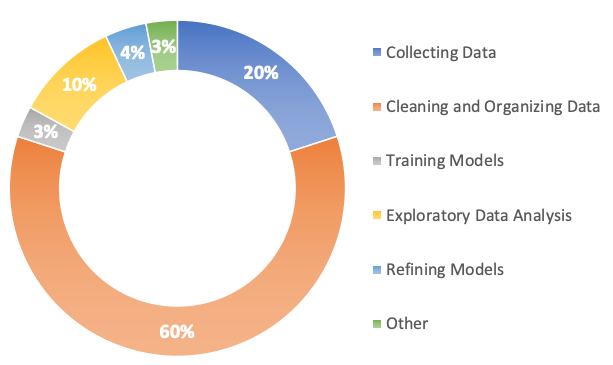

In [662]:
Image("e:/WORK/Python/Raschka/Data Processing.png") 

Forbes’s survey found that the least enjoyable part of a data scientist’s job encompasses 80% of their time. 20% is spent collecting data and another 60% is spent cleaning and organizing of data sets. Personally, I disagree with the notion that 80% is the least enjoyable part of our jobs. I often see the task of data cleansing as an open-ended problem. Typically, each data set can be processed in hundreds of different ways depending on the problem at hand but we can very rarely apply the same set of analyses and transformations from one dataset to another. I find that building different processing pipelines and examining how their differences affect model performance is an enjoyable part of my job.

With that said, I want to take the time and walk you through the code and the thought process of preparing a dataset for analysis which in this case will be a regression (ie. multiple regression).

## Dataset

Those of you who follow me know that I’m particular to human resources datasets as I have been working in the industry for most of my career.

If you have a rare HR dataset please share with us :)

We will be working with a dataset of 310 active and terminated employees along with information much as marital status, gender, department, pay rate, state, position, etc. Since we are prepping the data for regression analysis, our target feature is EngagementSurvey.

The code book for our dataset can be found [here](https://rpubs.com/rhuebner/HRCodebook-13).

## Analysis

In [663]:
with open('e:WORK/Python/Raschka/HRDataset_v13.csv') as f:
    df = pd.read_csv(f)
f.close()
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1103024456,1,1,0,1,1,3,1,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2,6,1/15/2019,0
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,1,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,5.00,4,4,1/17/2019,0
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,LinkedIn,Fully Meets,3.90,5,5,1/18/2019,0
3,"Howard, Estelle",1211050782,1,1,0,1,1,3,0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,LinkedIn,Fully Meets,3.24,3,4,4/15/2015,0
4,"Singh, Nan",1307059817,0,0,0,1,1,3,0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,LinkedIn,Fully Meets,5.00,3,5,1/15/2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Daniele, Ann",1411071312,1,1,0,3,3,3,0,54.10,...,IT/IS,Peter Monroe,7.0,LinkedIn,Fully Meets,1.55,5,8,2/12/2019,0
306,"Lajiri, Jyoti",1108028108,1,1,1,3,3,3,0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5,6,1/7/2019,0
307,"Semizoglou, Jeremiah",904013591,1,1,1,2,3,3,0,53.80,...,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,3.27,4,5,1/14/2019,0
308,"South, Joe",1308060959,0,0,1,1,3,3,0,53.00,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3,4,1/2/2019,0


In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               310 non-null    object 
 1   EmpID                       310 non-null    int64  
 2   MarriedID                   310 non-null    int64  
 3   MaritalStatusID             310 non-null    int64  
 4   GenderID                    310 non-null    int64  
 5   EmpStatusID                 310 non-null    int64  
 6   DeptID                      310 non-null    int64  
 7   PerfScoreID                 310 non-null    int64  
 8   FromDiversityJobFairID      310 non-null    int64  
 9   PayRate                     310 non-null    float64
 10  Termd                       310 non-null    int64  
 11  PositionID                  310 non-null    int64  
 12  Position                    310 non-null    object 
 13  State                       310 non

Upon loading our data we can see a number of unique feature types. We have categorical features such as “Employee_Name” and “Position”. We have binary features such as “MarriedID”. We have continuous features such as “PayRate” and “EmpSatisfaction”. We have discrete features such as “DaysLateLast30” and finally we have date features such as “LastPerformanceReview_Date”.

<br>
<br>

In [665]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
PayRate                         0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             128
TermReason                      1
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       5
RecruitmentSource               0
PerformanceSco

In [666]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EmpID,310.0,1.199745e+09,1.829600e+08,6.020003e+08,1.101024e+09,1.203032e+09,1.378814e+09,1.988300e+09
MarriedID,310.0,3.967742e-01,4.900194e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
MaritalStatusID,310.0,8.096774e-01,9.447024e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
GenderID,310.0,4.290323e-01,4.957382e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
EmpStatusID,310.0,2.396774e+00,1.795533e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00
DeptID,310.0,4.606452e+00,1.082349e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
PerfScoreID,310.0,2.983871e+00,5.771242e-01,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
FromDiversityJobFairID,310.0,1.612903e-01,3.683932e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
PayRate,310.0,3.128481e+01,1.538362e+01,1.400000e+01,2.000000e+01,2.400000e+01,4.531500e+01,8.000000e+01
Termd,310.0,3.322581e-01,4.717845e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [667]:
list(df.columns) 

['Employee_Name',
 'EmpID',
 'MarriedID',
 'MaritalStatusID',
 'GenderID',
 'EmpStatusID',
 'DeptID',
 'PerfScoreID',
 'FromDiversityJobFairID',
 'PayRate',
 'Termd',
 'PositionID',
 'Position',
 'State',
 'Zip',
 'DOB',
 'Sex',
 'MaritalDesc',
 'CitizenDesc',
 'HispanicLatino',
 'RaceDesc',
 'DateofHire',
 'DateofTermination',
 'TermReason',
 'EmploymentStatus',
 'Department',
 'ManagerName',
 'ManagerID',
 'RecruitmentSource',
 'PerformanceScore',
 'EngagementSurvey',
 'EmpSatisfaction',
 'SpecialProjectsCount',
 'LastPerformanceReview_Date',
 'DaysLateLast30']

In [668]:
 pd.crosstab(index=df["MarriedID"], columns="count")

col_0,count
MarriedID,
0,187
1,123


In [669]:
pd.crosstab(index=df["MaritalStatusID"], columns="count")

col_0,count
MaritalStatusID,
0,137
1,123
2,30
3,12
4,8


In [670]:
pd.crosstab(index=df["MaritalDesc"], columns="count")

col_0,count
MaritalDesc,
Divorced,30
Married,123
Separated,12
Single,137
Widowed,8


In [671]:
pd.crosstab(df["MaritalStatusID"], df["MaritalDesc"])

MaritalDesc,Divorced,Married,Separated,Single,Widowed
MaritalStatusID,,,,,
0,0,0,0,137,0
1,0,123,0,0,0
2,30,0,0,0,0
3,0,0,12,0,0
4,0,0,0,0,8


In [672]:
pd.crosstab(df["MaritalDesc"], df["MarriedID"])

MarriedID,0,1
MaritalDesc,,
Divorced,30,0
Married,0,123
Separated,12,0
Single,137,0
Widowed,8,0


In [673]:
pd.crosstab(index=df["GenderID"], columns="count")

col_0,count
GenderID,
0,177
1,133


In [674]:
pd.crosstab(index=df["Sex"], columns="count")

col_0,count
Sex,
F,177
M,133


In [675]:
pd.crosstab(df["Sex"], df["GenderID"])

GenderID,0,1
Sex,,
F,177,0
M,0,133


In [676]:
pd.crosstab(index=df["EmpStatusID"], columns="count")

col_0,count
EmpStatusID,
1,183
2,11
3,14
4,14
5,88


In [677]:
pd.crosstab(index=df["EmploymentStatus"], columns="count")

col_0,count
EmploymentStatus,
Active,184
Future Start,9
Leave of Absence,14
Terminated for Cause,15
Voluntarily Terminated,88


In [678]:
pd.crosstab(df["EmpStatusID"], df["EmploymentStatus"])

EmploymentStatus,Active,Future Start,Leave of Absence,Terminated for Cause,Voluntarily Terminated
EmpStatusID,,,,,
1,182,0,0,1,0
2,2,9,0,0,0
3,0,0,14,0,0
4,0,0,0,14,0
5,0,0,0,0,88


In [679]:
pd.crosstab(index=df["DeptID"], columns="count")

col_0,count
DeptID,
1,10
2,1
3,50
4,10
5,208
6,31


In [680]:
pd.crosstab(index=df["Department"], columns="count")

col_0,count
Department,
Admin Offices,10
Executive Office,1
IT/IS,50
Production,208
Sales,31
Software Engineering,10


In [681]:
pd.crosstab(df["Department"], df["DeptID"])

DeptID,1,2,3,4,5,6
Department,,,,,,
Admin Offices,10,0,0,0,0,0
Executive Office,0,1,0,0,0,0
IT/IS,0,0,50,0,0,0
Production,0,0,0,0,208,0
Sales,0,0,0,0,0,31
Software Engineering,0,0,0,10,0,0


In [682]:
pd.crosstab(index=df["PerfScoreID"], columns="count")

col_0,count
PerfScoreID,
1,12
2,18
3,243
4,37


In [683]:
pd.crosstab(index=df["FromDiversityJobFairID"], columns="count")

col_0,count
FromDiversityJobFairID,
0,260
1,50


In [684]:
pd.crosstab(index=df["PerfScoreID"], columns="count")

col_0,count
PerfScoreID,
1,12
2,18
3,243
4,37


In [685]:
pd.crosstab(index=df["PerformanceScore"], columns="count")

col_0,count
PerformanceScore,
Exceeds,37
Fully Meets,243
Needs Improvement,18
PIP,12


In [686]:
pd.crosstab(df["PerformanceScore"], df["PerfScoreID"])

PerfScoreID,1,2,3,4
PerformanceScore,,,,
Exceeds,0,0,0,37
Fully Meets,0,0,243,0
Needs Improvement,0,18,0,0
PIP,12,0,0,0


In [687]:
pd.crosstab(index=df["PositionID"], columns="count")

col_0,count
PositionID,
1,3
2,3
3,27
4,4
5,1
6,1
7,1
8,5
9,8


In [688]:
pd.crosstab(index=df["Position"], columns="count")

col_0,count
Position,
Accountant I,3
Administrative Assistant,3
Area Sales Manager,27
BI Developer,4
BI Director,1
CIO,1
Data Analyst,7
Data Analyst,1
Data Architect,1


In [689]:
pd.crosstab(df["Position"], df["PositionID"])

PositionID,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
Position,,,,,,,,,,,,,,,,,,,,,
Accountant I,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Administrative Assistant,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Area Sales Manager,0,0,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BI Developer,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BI Director,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CIO,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Data Analyst,0,0,0,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
Data Analyst,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Data Architect,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<br>
<br>

## High or Low Feature Variability

The first step I typically take is reviewing the unique count of values per feature to determine if any features can be quickly deleted due to very high or very low variability. In other words, do we have any features which have as many unique values as the length of the dataset or features which have just one unique value?

In [690]:
for col in df.columns:
    print(col, df[col].nunique(), len(df))

Employee_Name 310 310
EmpID 310 310
MarriedID 2 310
MaritalStatusID 5 310
GenderID 2 310
EmpStatusID 5 310
DeptID 6 310
PerfScoreID 4 310
FromDiversityJobFairID 2 310
PayRate 94 310
Termd 2 310
PositionID 30 310
Position 32 310
State 28 310
Zip 158 310
DOB 306 310
Sex 2 310
MaritalDesc 5 310
CitizenDesc 3 310
HispanicLatino 4 310
RaceDesc 6 310
DateofHire 99 310
DateofTermination 173 310
TermReason 18 310
EmploymentStatus 5 310
Department 6 310
ManagerName 21 310
ManagerID 23 310
RecruitmentSource 8 310
PerformanceScore 4 310
EngagementSurvey 188 310
EmpSatisfaction 5 310
SpecialProjectsCount 8 310
LastPerformanceReview_Date 193 310
DaysLateLast30 8 310


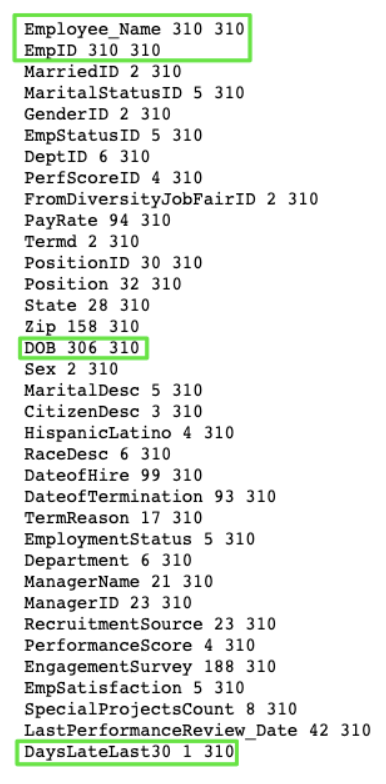

In [691]:
Image("e:/WORK/Python/Raschka/Feature Variability.png", width=300) 

In [692]:
df.drop(['Employee_Name'], axis=1, inplace=True)
df.drop(['EmpID'], axis=1, inplace=True)
df.drop(['DOB'], axis=1, inplace=True)
df.drop(['DaysLateLast30'], axis=1, inplace=True)

We can safely remove “Employee_Name”, “Emp_ID”, “DOB” since most if not all, values are unique for each feature. Also, we can remove “DaysLateLast30” as this feature only contains one unique value.

In [693]:
df

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,...,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date
0,1,1,0,1,1,3,1,28.50,0,1,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2,6,1/15/2019
1,0,2,1,1,1,3,1,23.00,0,1,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,5.00,4,4,1/17/2019
2,0,0,1,1,1,3,0,29.00,0,1,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,LinkedIn,Fully Meets,3.90,5,5,1/18/2019
3,1,1,0,1,1,3,0,21.50,1,2,...,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,LinkedIn,Fully Meets,3.24,3,4,4/15/2015
4,0,0,0,1,1,3,0,16.56,0,2,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,LinkedIn,Fully Meets,5.00,3,5,1/15/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,1,1,0,3,3,3,0,54.10,0,28,...,Leave of Absence,IT/IS,Peter Monroe,7.0,LinkedIn,Fully Meets,1.55,5,8,2/12/2019
306,1,1,1,3,3,3,0,56.20,0,28,...,Leave of Absence,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5,6,1/7/2019
307,1,1,1,2,3,3,0,53.80,0,28,...,Future Start,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,3.27,4,5,1/14/2019
308,0,0,1,1,3,3,0,53.00,0,28,...,Active,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,5.00,3,4,1/2/2019


## Duplicate Features

Next, by examining the codebook, which contains the definitions for each feature, we can see that we have many duplicate features. For example, “MarriedStatusID” is a numerical feature that produces the code that matches the married statues in “MaritalDesc” feature. We can drop these features.

In [694]:
df.drop(['MaritalStatusID', 'EmpStatusID', 'DeptID'], axis=1, inplace=True)
df.drop(['GenderID'], axis=1, inplace=True)
df.drop(['PerformanceScore'], axis=1, inplace=True)
df.drop(['MarriedID'], axis=1, inplace=True)

In [695]:
df

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,Sex,MaritalDesc,...,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date
0,3,1,28.50,0,1,Accountant I,MA,1450,F,Married,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,2.04,2,6,1/15/2019
1,3,1,23.00,0,1,Accountant I,MA,1460,M,Divorced,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,5.00,4,4,1/17/2019
2,3,0,29.00,0,1,Accountant I,MA,2703,M,Single,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,LinkedIn,3.90,5,5,1/18/2019
3,3,0,21.50,1,2,Administrative Assistant,MA,2170,F,Married,...,aggressive toward employee,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,LinkedIn,3.24,3,4,4/15/2015
4,3,0,16.56,0,2,Administrative Assistant,MA,2330,F,Single,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,LinkedIn,5.00,3,5,1/15/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3,0,54.10,0,28,Sr. Network Engineer,CT,6033,F,Married,...,N/A - still employed,Leave of Absence,IT/IS,Peter Monroe,7.0,LinkedIn,1.55,5,8,2/12/2019
306,3,0,56.20,0,28,Sr. Network Engineer,MA,2169,M,Married,...,N/A - still employed,Leave of Absence,IT/IS,Peter Monroe,7.0,Employee Referral,4.46,5,6,1/7/2019
307,3,0,53.80,0,28,Sr. Network Engineer,MA,1545,M,Married,...,N/A - Has not started yet,Future Start,IT/IS,Peter Monroe,7.0,Indeed,3.27,4,5,1/14/2019
308,3,0,53.00,0,28,Sr. Network Engineer,CT,6278,M,Single,...,N/A - still employed,Active,IT/IS,Peter Monroe,7.0,Employee Referral,5.00,3,4,1/2/2019


You might be asking yourself “What about ‘PositionID’, ‘Position’, ‘ManagerID’ and ManagerName’?”. As you can see from the output above, the unique value counts for these feature pairs do not match. “PositionID” has 32 unique values whereas “Position” has 30.

In [696]:
df[['PositionID', 'Position']].sort_values('PositionID')[50:70]

,PositionID,Position
50,9,Data Analyst
51,9,Data Analyst
52,9,Data Analyst
53,10,Director of Operations
54,11,Director of Sales
55,12,IT Director
56,13,IT Manager - DB
57,13,IT Manager - DB
58,13,IT Manager - Infra
59,13,IT Manager - Support


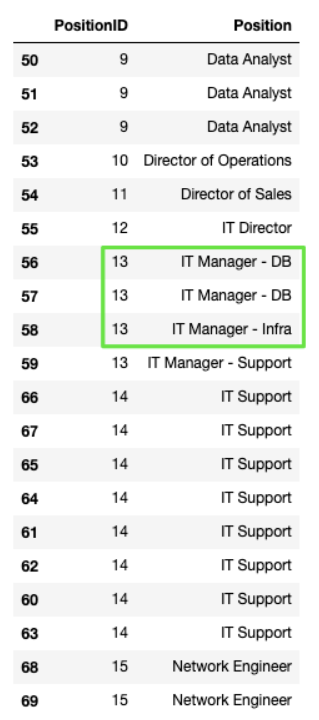

In [697]:
Image("e:/WORK/Python/Raschka/Duplicate Features.png", width=250) 

In [698]:
df[['ManagerName', 'ManagerID']].sort_values(by='ManagerID').tail(50)

,ManagerName,ManagerID
27,Lynn Daneault,21.0
28,Lynn Daneault,21.0
29,Lynn Daneault,21.0
30,Lynn Daneault,21.0
31,Lynn Daneault,21.0
26,Lynn Daneault,21.0
32,Lynn Daneault,21.0
207,Michael Albert,22.0
206,Michael Albert,22.0
205,Michael Albert,22.0


In [699]:
df.drop('PositionID', axis=1, inplace=True)
df.drop('ManagerID', axis=1, inplace=True)

In [700]:
df

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,...,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date
0,3,1,28.50,0,Accountant I,MA,1450,F,Married,US Citizen,...,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,2.04,2,6,1/15/2019
1,3,1,23.00,0,Accountant I,MA,1460,M,Divorced,US Citizen,...,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,Diversity Job Fair,5.00,4,4,1/17/2019
2,3,0,29.00,0,Accountant I,MA,2703,M,Single,US Citizen,...,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,LinkedIn,3.90,5,5,1/18/2019
3,3,0,21.50,1,Administrative Assistant,MA,2170,F,Married,US Citizen,...,04/15/15,aggressive toward employee,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,LinkedIn,3.24,3,4,4/15/2015
4,3,0,16.56,0,Administrative Assistant,MA,2330,F,Single,US Citizen,...,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,LinkedIn,5.00,3,5,1/15/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3,0,54.10,0,Sr. Network Engineer,CT,6033,F,Married,US Citizen,...,NaN,N/A - still employed,Leave of Absence,IT/IS,Peter Monroe,LinkedIn,1.55,5,8,2/12/2019
306,3,0,56.20,0,Sr. Network Engineer,MA,2169,M,Married,US Citizen,...,NaN,N/A - still employed,Leave of Absence,IT/IS,Peter Monroe,Employee Referral,4.46,5,6,1/7/2019
307,3,0,53.80,0,Sr. Network Engineer,MA,1545,M,Married,US Citizen,...,NaN,N/A - Has not started yet,Future Start,IT/IS,Peter Monroe,Indeed,3.27,4,5,1/14/2019
308,3,0,53.00,0,Sr. Network Engineer,CT,6278,M,Single,US Citizen,...,NaN,N/A - still employed,Active,IT/IS,Peter Monroe,Employee Referral,5.00,3,4,1/2/2019


We are going to drop “PositionID” as it does not maintain all available positions and we are going to drop “ManagerID” as “ManagerName” does not contain any missing values.

## Odd Values and Data Collection Mistakes

Next, let’s examine the individual unique values for each feature. This will help us see any odds values and mistakes which will need to be fixed.

In [701]:
for col in df.columns:
    print(col, df[col].unique(), len(df))

PerfScoreID [3 1 4 2] 310
FromDiversityJobFairID [1 0] 310
PayRate [28.5  23.   29.   21.5  16.56 20.5  55.   56.   55.5  54.   57.   45.
 46.   63.5  65.   43.   48.5  40.1  34.   40.   35.5  41.   42.75 39.55
 42.2  30.2  31.4  60.   62.   21.   63.   64.   28.99 26.   27.49 42.
 37.   39.   27.   47.   28.   49.1  80.   54.5  50.5  51.   53.   38.5
 52.   33.5  16.   20.   18.   24.   15.   22.   24.75 17.   16.75 19.
 19.5  14.   16.76 15.75 21.25 24.5  18.5  19.75 15.25 23.5  15.2  25.
 24.25 26.1  26.39 28.75 22.5  60.25 50.25 52.25 47.6  57.12 55.51 49.25
 48.   45.42 34.95 61.3  58.2  58.5  54.1  56.2  53.8  55.2 ] 310
Termd [0 1] 310
Position ['Accountant I' 'Administrative Assistant' 'Area Sales Manager'
 'BI Developer' 'BI Director' 'CIO' 'Data Architect'
 'Database Administrator' 'Data Analyst' 'Data Analyst '
 'Director of Operations' 'Director of Sales' 'IT Director'
 'IT Manager - DB' 'IT Manager - Infra' 'IT Manager - Support'
 'IT Support' 'Network Engineer' 'President

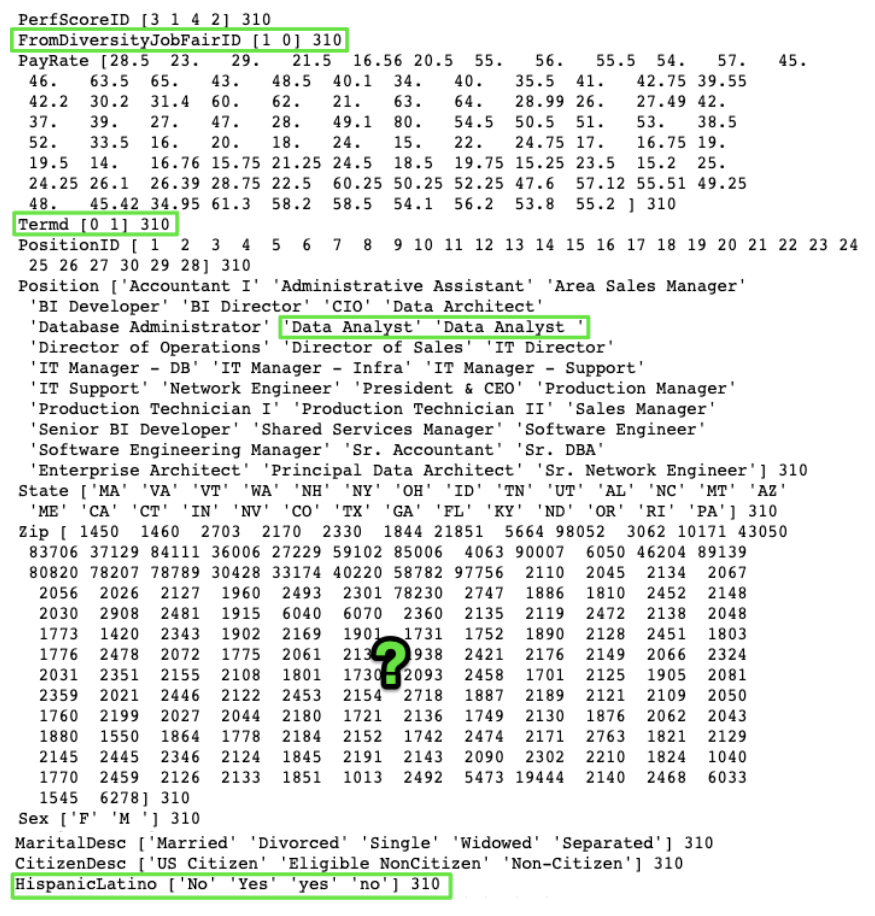

In [702]:
Image("e:/WORK/Python/Raschka/Odd Values and Data Collection Mistakes.png", width=500) 

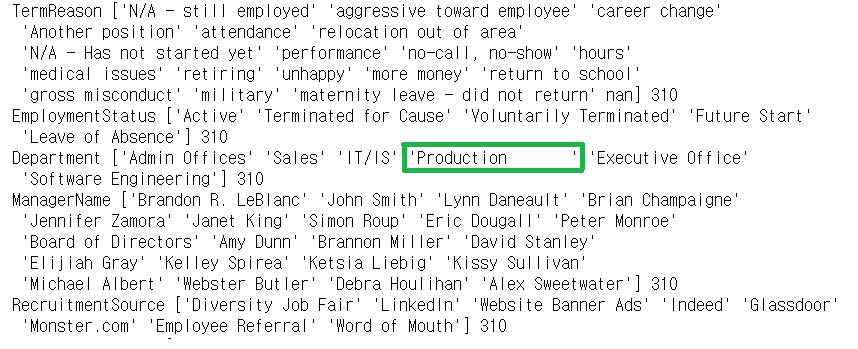

In [703]:
Image("e:/WORK/Python/Raschka/Odd Values and Data Collection Mistakes-2.png", width=550) 

In [704]:
pd.crosstab(index=df["FromDiversityJobFairID"], columns="count")

col_0,count
FromDiversityJobFairID,
0,260
1,50


In [705]:
pd.crosstab(index=df["Termd"], columns="count")

col_0,count
Termd,
0,207
1,103


In [706]:
pd.crosstab(index=df["HispanicLatino"], columns="count")

col_0,count
HispanicLatino,
No,281
Yes,27
no,1
yes,1


From the codebook, we know that features such as “FromDiversityJobFairID”, and “Termd” are binary codings for “Yes” and “No”. In order to simplify our analysis and help with formatting, we need to convert the binary to string. We also see trailing spaces for the position of “Data Analyst” and Department of “Production” which need to be removed. Finally, we see a coding mistake for “HispanicLatino” which needs to be corrected.

In [707]:
diversity_map = {1: 'yes', 0: 'no'}
termd_map = {1: 'yes', 0: 'no'}
hispanic_latino_map = {'No': 'no', 'Yes': 'yes', 'no': 'no', 'yes': 'yes'}

df['FromDiversityJobFairID'].replace(diversity_map, inplace=True)
df['Termd'].replace(termd_map, inplace=True)
df['HispanicLatino'].replace(hispanic_latino_map, inplace=True)
df['Position'] = df['Position'].str.strip()
df['Department'] = df['Department'].str.strip()

In [708]:
for col in df.columns:
    print(col, df[col].unique(), len(df))

PerfScoreID [3 1 4 2] 310
FromDiversityJobFairID ['yes' 'no'] 310
PayRate [28.5  23.   29.   21.5  16.56 20.5  55.   56.   55.5  54.   57.   45.
 46.   63.5  65.   43.   48.5  40.1  34.   40.   35.5  41.   42.75 39.55
 42.2  30.2  31.4  60.   62.   21.   63.   64.   28.99 26.   27.49 42.
 37.   39.   27.   47.   28.   49.1  80.   54.5  50.5  51.   53.   38.5
 52.   33.5  16.   20.   18.   24.   15.   22.   24.75 17.   16.75 19.
 19.5  14.   16.76 15.75 21.25 24.5  18.5  19.75 15.25 23.5  15.2  25.
 24.25 26.1  26.39 28.75 22.5  60.25 50.25 52.25 47.6  57.12 55.51 49.25
 48.   45.42 34.95 61.3  58.2  58.5  54.1  56.2  53.8  55.2 ] 310
Termd ['no' 'yes'] 310
Position ['Accountant I' 'Administrative Assistant' 'Area Sales Manager'
 'BI Developer' 'BI Director' 'CIO' 'Data Architect'
 'Database Administrator' 'Data Analyst' 'Director of Operations'
 'Director of Sales' 'IT Director' 'IT Manager - DB' 'IT Manager - Infra'
 'IT Manager - Support' 'IT Support' 'Network Engineer' 'President & 

You might be asking yourself “How come some zip codes are 5 digits and some are only 4?”. In the US all zip codes are 5 digits long. After a little bit of googling, many Massachusetts zip codes actually begin with zero, and by default, python stripped the zeros which resulted in 4 digit zip codes. Since we will be treating zip codes as a categorical feature the length wouldn’t matter.

## Dealing with DateTime Features

Believe it or not but datetime features very often contain a plethora of info just waiting to be unleashed. This is especially evident when one is familiar with the industry from which the data originates from.

In [709]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'])
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])

In [710]:
df[["DateofHire","DateofTermination","LastPerformanceReview_Date"]]

,DateofHire,DateofTermination,LastPerformanceReview_Date
0,2008-10-27,NaT,2019-01-15
1,2014-01-06,NaT,2019-01-17
2,2014-09-29,NaT,2019-01-18
3,2015-02-16,2015-04-15,2015-04-15
4,2015-05-01,NaT,2019-01-15
...,...,...,...
305,2014-11-10,NaT,2019-02-12
306,2014-11-10,NaT,2019-01-07
307,2016-06-30,NaT,2019-01-14
308,2014-11-10,NaT,2019-01-02


In [711]:
# 특성 'DateofHire'를 대상으로 새로운 특성 6개를 생성함
df['DateofHire_month'] = df['DateofHire'].dt.month
df['DateofHire_day'] = df['DateofHire'].dt.day 
df['DateofHire_year'] = df['DateofHire'].dt.year
df['DateofHire_quarter'] = df['DateofHire'].dt.quarter
df['DateofHire_day_week'] = df['DateofHire'].dt.day_name()
df['DateofHire_weekday'] = np.where(df['DateofHire_day_week'].isin(['Sunday','Saturday']),'yes','no')

In [712]:
df

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,...,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DateofHire_month,DateofHire_day,DateofHire_year,DateofHire_quarter,DateofHire_day_week,DateofHire_weekday
0,3,yes,28.50,no,Accountant I,MA,1450,F,Married,US Citizen,...,2.04,2,6,2019-01-15,10,27,2008,4,Monday,no
1,3,yes,23.00,no,Accountant I,MA,1460,M,Divorced,US Citizen,...,5.00,4,4,2019-01-17,1,6,2014,1,Monday,no
2,3,no,29.00,no,Accountant I,MA,2703,M,Single,US Citizen,...,3.90,5,5,2019-01-18,9,29,2014,3,Monday,no
3,3,no,21.50,yes,Administrative Assistant,MA,2170,F,Married,US Citizen,...,3.24,3,4,2015-04-15,2,16,2015,1,Monday,no
4,3,no,16.56,no,Administrative Assistant,MA,2330,F,Single,US Citizen,...,5.00,3,5,2019-01-15,5,1,2015,2,Friday,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3,no,54.10,no,Sr. Network Engineer,CT,6033,F,Married,US Citizen,...,1.55,5,8,2019-02-12,11,10,2014,4,Monday,no
306,3,no,56.20,no,Sr. Network Engineer,MA,2169,M,Married,US Citizen,...,4.46,5,6,2019-01-07,11,10,2014,4,Monday,no
307,3,no,53.80,no,Sr. Network Engineer,MA,1545,M,Married,US Citizen,...,3.27,4,5,2019-01-14,6,30,2016,2,Thursday,no
308,3,no,53.00,no,Sr. Network Engineer,CT,6278,M,Single,US Citizen,...,5.00,3,4,2019-01-02,11,10,2014,4,Monday,no


In [713]:
# 특성 'DateofTermination'을 대상으로 새로운 특성 6개를 생성함
df['DateofTerm_month'] = df['DateofTermination'].dt.month
df['DateofTerm_day'] = df['DateofTermination'].dt.day
df['DateofTerm_year'] = df['DateofTermination'].dt.year
df['DateofTerm_quarter'] = df['DateofTermination'].dt.quarter
df['DateofTerm_day_week'] = df['DateofTermination'].dt.day_name()
df['DateofTerm_weekday'] = np.where(df['DateofTerm_day_week'].isin(['Sunday','Saturday']),'yes','no')

In [714]:
df

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,...,DateofHire_year,DateofHire_quarter,DateofHire_day_week,DateofHire_weekday,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,DateofTerm_weekday
0,3,yes,28.50,no,Accountant I,MA,1450,F,Married,US Citizen,...,2008,4,Monday,no,NaN,NaN,NaN,NaN,NaN,no
1,3,yes,23.00,no,Accountant I,MA,1460,M,Divorced,US Citizen,...,2014,1,Monday,no,NaN,NaN,NaN,NaN,NaN,no
2,3,no,29.00,no,Accountant I,MA,2703,M,Single,US Citizen,...,2014,3,Monday,no,NaN,NaN,NaN,NaN,NaN,no
3,3,no,21.50,yes,Administrative Assistant,MA,2170,F,Married,US Citizen,...,2015,1,Monday,no,4.0,15.0,2015.0,2.0,Wednesday,no
4,3,no,16.56,no,Administrative Assistant,MA,2330,F,Single,US Citizen,...,2015,2,Friday,no,NaN,NaN,NaN,NaN,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3,no,54.10,no,Sr. Network Engineer,CT,6033,F,Married,US Citizen,...,2014,4,Monday,no,NaN,NaN,NaN,NaN,NaN,no
306,3,no,56.20,no,Sr. Network Engineer,MA,2169,M,Married,US Citizen,...,2014,4,Monday,no,NaN,NaN,NaN,NaN,NaN,no
307,3,no,53.80,no,Sr. Network Engineer,MA,1545,M,Married,US Citizen,...,2016,2,Thursday,no,NaN,NaN,NaN,NaN,NaN,no
308,3,no,53.00,no,Sr. Network Engineer,CT,6278,M,Single,US Citizen,...,2014,4,Monday,no,NaN,NaN,NaN,NaN,NaN,no


In [715]:
# # 특성 'LastPerformanceReview_Date'를 대상으로 새로운 특성 6개를 생성함
df['LastPerform_month'] = df['LastPerformanceReview_Date'].dt.month
df['LastPerform_day'] = df['LastPerformanceReview_Date'].dt.day 
df['LastPerform_year'] = df['LastPerformanceReview_Date'].dt.year 
df['LastPerform_quarter'] = df['LastPerformanceReview_Date'].dt.quarter
df['LastPerform_day_week'] = df['LastPerformanceReview_Date'].dt.day_name()
df['LastPerform_weekday'] = np.where(df['LastPerform_day_week'].isin(['Sunday','Saturday']),'yes','no')

In [716]:
df

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,...,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,DateofTerm_weekday,LastPerform_month,LastPerform_day,LastPerform_year,LastPerform_quarter,LastPerform_day_week,LastPerform_weekday
0,3,yes,28.50,no,Accountant I,MA,1450,F,Married,US Citizen,...,NaN,NaN,NaN,no,1,15,2019,1,Tuesday,no
1,3,yes,23.00,no,Accountant I,MA,1460,M,Divorced,US Citizen,...,NaN,NaN,NaN,no,1,17,2019,1,Thursday,no
2,3,no,29.00,no,Accountant I,MA,2703,M,Single,US Citizen,...,NaN,NaN,NaN,no,1,18,2019,1,Friday,no
3,3,no,21.50,yes,Administrative Assistant,MA,2170,F,Married,US Citizen,...,2015.0,2.0,Wednesday,no,4,15,2015,2,Wednesday,no
4,3,no,16.56,no,Administrative Assistant,MA,2330,F,Single,US Citizen,...,NaN,NaN,NaN,no,1,15,2019,1,Tuesday,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3,no,54.10,no,Sr. Network Engineer,CT,6033,F,Married,US Citizen,...,NaN,NaN,NaN,no,2,12,2019,1,Tuesday,no
306,3,no,56.20,no,Sr. Network Engineer,MA,2169,M,Married,US Citizen,...,NaN,NaN,NaN,no,1,7,2019,1,Monday,no
307,3,no,53.80,no,Sr. Network Engineer,MA,1545,M,Married,US Citizen,...,NaN,NaN,NaN,no,1,14,2019,1,Monday,no
308,3,no,53.00,no,Sr. Network Engineer,CT,6278,M,Single,US Citizen,...,NaN,NaN,NaN,no,1,2,2019,1,Wednesday,no


In [717]:
# 날짜 관련 3개의 특성들'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date'를 이용하여 3개의 새로운 특성을 생성함
df['tenure_termed'] = df['DateofTermination'] - df['DateofHire']
df['tenure'] = datetime.datetime.today() - df['DateofHire']
df['days_since_review'] = datetime.datetime.today() - df['LastPerformanceReview_Date']

In [718]:
df

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,...,DateofTerm_weekday,LastPerform_month,LastPerform_day,LastPerform_year,LastPerform_quarter,LastPerform_day_week,LastPerform_weekday,tenure_termed,tenure,days_since_review
0,3,yes,28.50,no,Accountant I,MA,1450,F,Married,US Citizen,...,no,1,15,2019,1,Tuesday,no,NaT,4355 days 04:01:41.193741,623 days 04:01:41.194738
1,3,yes,23.00,no,Accountant I,MA,1460,M,Divorced,US Citizen,...,no,1,17,2019,1,Thursday,no,NaT,2458 days 04:01:41.193741,621 days 04:01:41.194738
2,3,no,29.00,no,Accountant I,MA,2703,M,Single,US Citizen,...,no,1,18,2019,1,Friday,no,NaT,2192 days 04:01:41.193741,620 days 04:01:41.194738
3,3,no,21.50,yes,Administrative Assistant,MA,2170,F,Married,US Citizen,...,no,4,15,2015,2,Wednesday,no,58 days,2052 days 04:01:41.193741,1994 days 04:01:41.194738
4,3,no,16.56,no,Administrative Assistant,MA,2330,F,Single,US Citizen,...,no,1,15,2019,1,Tuesday,no,NaT,1978 days 04:01:41.193741,623 days 04:01:41.194738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3,no,54.10,no,Sr. Network Engineer,CT,6033,F,Married,US Citizen,...,no,2,12,2019,1,Tuesday,no,NaT,2150 days 04:01:41.193741,595 days 04:01:41.194738
306,3,no,56.20,no,Sr. Network Engineer,MA,2169,M,Married,US Citizen,...,no,1,7,2019,1,Monday,no,NaT,2150 days 04:01:41.193741,631 days 04:01:41.194738
307,3,no,53.80,no,Sr. Network Engineer,MA,1545,M,Married,US Citizen,...,no,1,14,2019,1,Monday,no,NaT,1552 days 04:01:41.193741,624 days 04:01:41.194738
308,3,no,53.00,no,Sr. Network Engineer,CT,6278,M,Single,US Citizen,...,no,1,2,2019,1,Wednesday,no,NaT,2150 days 04:01:41.193741,636 days 04:01:41.194738


In [719]:
# 새로 생성된 특성들로 인해 정보가 중복되는 날짜 관련 3개의 특성들'
# DateofHire', 'DateofTermination', 'LastPerformanceReview_Date'를 삭제함
df.drop(['DateofHire', 'DateofTermination', 'LastPerformanceReview_Date'], axis=1, inplace=True)

In [720]:
df

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,...,DateofTerm_weekday,LastPerform_month,LastPerform_day,LastPerform_year,LastPerform_quarter,LastPerform_day_week,LastPerform_weekday,tenure_termed,tenure,days_since_review
0,3,yes,28.50,no,Accountant I,MA,1450,F,Married,US Citizen,...,no,1,15,2019,1,Tuesday,no,NaT,4355 days 04:01:41.193741,623 days 04:01:41.194738
1,3,yes,23.00,no,Accountant I,MA,1460,M,Divorced,US Citizen,...,no,1,17,2019,1,Thursday,no,NaT,2458 days 04:01:41.193741,621 days 04:01:41.194738
2,3,no,29.00,no,Accountant I,MA,2703,M,Single,US Citizen,...,no,1,18,2019,1,Friday,no,NaT,2192 days 04:01:41.193741,620 days 04:01:41.194738
3,3,no,21.50,yes,Administrative Assistant,MA,2170,F,Married,US Citizen,...,no,4,15,2015,2,Wednesday,no,58 days,2052 days 04:01:41.193741,1994 days 04:01:41.194738
4,3,no,16.56,no,Administrative Assistant,MA,2330,F,Single,US Citizen,...,no,1,15,2019,1,Tuesday,no,NaT,1978 days 04:01:41.193741,623 days 04:01:41.194738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3,no,54.10,no,Sr. Network Engineer,CT,6033,F,Married,US Citizen,...,no,2,12,2019,1,Tuesday,no,NaT,2150 days 04:01:41.193741,595 days 04:01:41.194738
306,3,no,56.20,no,Sr. Network Engineer,MA,2169,M,Married,US Citizen,...,no,1,7,2019,1,Monday,no,NaT,2150 days 04:01:41.193741,631 days 04:01:41.194738
307,3,no,53.80,no,Sr. Network Engineer,MA,1545,M,Married,US Citizen,...,no,1,14,2019,1,Monday,no,NaT,1552 days 04:01:41.193741,624 days 04:01:41.194738
308,3,no,53.00,no,Sr. Network Engineer,CT,6278,M,Single,US Citizen,...,no,1,2,2019,1,Wednesday,no,NaT,2150 days 04:01:41.193741,636 days 04:01:41.194738


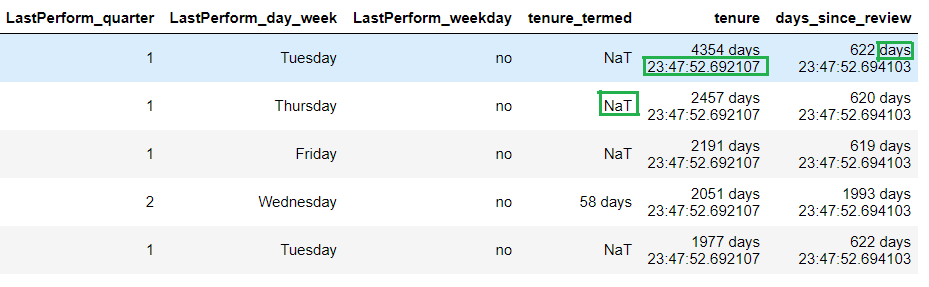

In [721]:
Image("e:/WORK/Python/Raschka/Dealing with DateTime Features.png", width=700) 

First, we need to convert our features to datetime format. Next, using the “datetime” library we can extract new features from our original datetime features with information such as a month, day, year, quarter, weekday string, and even whether or not the day falls on a weekend. Finally, we can subtract individual dates from each other to calculate things like tenure_termed (terminated date — hire date) and tenure (today’s date — hire date). Once we have extracted the necessary information we can drop the original features.

In [722]:
df['days_since_review'] = df['days_since_review'].astype(str)
df['days_since_review'] = [i[0:3] for i in df['days_since_review']]
df['tenure'] = df['tenure'].astype(str)
df['tenure'] = [i[0:3] for i in df['tenure']]
df['tenure_termed'] = df['tenure_termed'].astype(str)
df['tenure_termed'] = [i[0:2] for i in df['tenure_termed']]
for var in df.columns:
    df[var].replace(to_replace=['NaT','Na'], value=np.nan, inplace=True)

In [723]:
df

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,...,DateofTerm_weekday,LastPerform_month,LastPerform_day,LastPerform_year,LastPerform_quarter,LastPerform_day_week,LastPerform_weekday,tenure_termed,tenure,days_since_review
0,3,yes,28.50,no,Accountant I,MA,1450,F,Married,US Citizen,...,no,1,15,2019,1,Tuesday,no,NaN,435,623
1,3,yes,23.00,no,Accountant I,MA,1460,M,Divorced,US Citizen,...,no,1,17,2019,1,Thursday,no,NaN,245,621
2,3,no,29.00,no,Accountant I,MA,2703,M,Single,US Citizen,...,no,1,18,2019,1,Friday,no,NaN,219,620
3,3,no,21.50,yes,Administrative Assistant,MA,2170,F,Married,US Citizen,...,no,4,15,2015,2,Wednesday,no,58,205,199
4,3,no,16.56,no,Administrative Assistant,MA,2330,F,Single,US Citizen,...,no,1,15,2019,1,Tuesday,no,NaN,197,623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3,no,54.10,no,Sr. Network Engineer,CT,6033,F,Married,US Citizen,...,no,2,12,2019,1,Tuesday,no,NaN,215,595
306,3,no,56.20,no,Sr. Network Engineer,MA,2169,M,Married,US Citizen,...,no,1,7,2019,1,Monday,no,NaN,215,631
307,3,no,53.80,no,Sr. Network Engineer,MA,1545,M,Married,US Citizen,...,no,1,14,2019,1,Monday,no,NaN,155,624
308,3,no,53.00,no,Sr. Network Engineer,CT,6278,M,Single,US Citizen,...,no,1,2,2019,1,Wednesday,no,NaN,215,636


In [724]:
print(df.dtypes)

PerfScoreID                 int64
FromDiversityJobFairID     object
PayRate                   float64
Termd                      object
Position                   object
State                      object
Zip                         int64
Sex                        object
MaritalDesc                object
CitizenDesc                object
HispanicLatino             object
RaceDesc                   object
TermReason                 object
EmploymentStatus           object
Department                 object
ManagerName                object
RecruitmentSource          object
EngagementSurvey          float64
EmpSatisfaction             int64
SpecialProjectsCount        int64
DateofHire_month            int64
DateofHire_day              int64
DateofHire_year             int64
DateofHire_quarter          int64
DateofHire_day_week        object
DateofHire_weekday         object
DateofTerm_month          float64
DateofTerm_day            float64
DateofTerm_year           float64
DateofTerm_qua

In [725]:
df['days_since_review'] = df['days_since_review'].astype(int)

In [726]:
print(df.dtypes)

PerfScoreID                 int64
FromDiversityJobFairID     object
PayRate                   float64
Termd                      object
Position                   object
State                      object
Zip                         int64
Sex                        object
MaritalDesc                object
CitizenDesc                object
HispanicLatino             object
RaceDesc                   object
TermReason                 object
EmploymentStatus           object
Department                 object
ManagerName                object
RecruitmentSource          object
EngagementSurvey          float64
EmpSatisfaction             int64
SpecialProjectsCount        int64
DateofHire_month            int64
DateofHire_day              int64
DateofHire_year             int64
DateofHire_quarter          int64
DateofHire_day_week        object
DateofHire_weekday         object
DateofTerm_month          float64
DateofTerm_day            float64
DateofTerm_year           float64
DateofTerm_qua

Perhaps I’m being a little obsessive-compulsive but I like tidy datasets, therefore, let’s remove the irrelevant information such as “days” and the timestamp from these new features. Finally, we convert the ‘NaT” and “Na” to true numpy “NaN”.

## Examining Cardinality

In [727]:
for var in df.columns:
    print(var, '\n', df[var].value_counts()/len(df))

PerfScoreID 
 3    0.783871
4    0.119355
2    0.058065
1    0.038710
Name: PerfScoreID, dtype: float64
FromDiversityJobFairID 
 no     0.83871
yes    0.16129
Name: FromDiversityJobFairID, dtype: float64
PayRate 
 22.00    0.080645
55.00    0.080645
20.00    0.051613
21.00    0.051613
24.00    0.048387
           ...   
60.25    0.003226
50.25    0.003226
49.25    0.003226
48.00    0.003226
28.50    0.003226
Name: PayRate, Length: 94, dtype: float64
Termd 
 no     0.667742
yes    0.332258
Name: Termd, dtype: float64
Position 
 Production Technician I         0.438710
Production Technician II        0.183871
Area Sales Manager              0.087097
Production Manager              0.045161
Software Engineer               0.029032
IT Support                      0.025806
Data Analyst                    0.025806
Network Engineer                0.016129
Sr. Network Engineer            0.016129
Database Administrator          0.016129
BI Developer                    0.012903
Sales Manager   

In [728]:
df.drop(['CitizenDesc', 'DateofHire_weekday', 'DateofTerm_weekday', 
         'LastPerform_quarter', 'LastPerform_weekday', 'LastPerform_year'], axis=1, inplace=True)

In [729]:
df

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure_termed,tenure,days_since_review
0,3,yes,28.50,no,Accountant I,MA,1450,F,Married,no,...,NaN,NaN,NaN,NaN,1,15,Tuesday,NaN,435,623
1,3,yes,23.00,no,Accountant I,MA,1460,M,Divorced,no,...,NaN,NaN,NaN,NaN,1,17,Thursday,NaN,245,621
2,3,no,29.00,no,Accountant I,MA,2703,M,Single,no,...,NaN,NaN,NaN,NaN,1,18,Friday,NaN,219,620
3,3,no,21.50,yes,Administrative Assistant,MA,2170,F,Married,no,...,15.0,2015.0,2.0,Wednesday,4,15,Wednesday,58,205,199
4,3,no,16.56,no,Administrative Assistant,MA,2330,F,Single,no,...,NaN,NaN,NaN,NaN,1,15,Tuesday,NaN,197,623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3,no,54.10,no,Sr. Network Engineer,CT,6033,F,Married,no,...,NaN,NaN,NaN,NaN,2,12,Tuesday,NaN,215,595
306,3,no,56.20,no,Sr. Network Engineer,MA,2169,M,Married,no,...,NaN,NaN,NaN,NaN,1,7,Monday,NaN,215,631
307,3,no,53.80,no,Sr. Network Engineer,MA,1545,M,Married,no,...,NaN,NaN,NaN,NaN,1,14,Monday,NaN,155,624
308,3,no,53.00,no,Sr. Network Engineer,CT,6278,M,Single,no,...,NaN,NaN,NaN,NaN,1,2,Wednesday,NaN,215,636


## Low Variance

Cardinality refers to the number of unique values/categories for each feature. Numeric, especially continuous, features will have very high cardinality but we mainly need to concern ourselves from categorical features. First, we need to identify features that contain values/categories which suck up all the variance. In other words, 90%+ of all the observations fall under one or two values. For example, “CitizenDesc” has three unique values but we see that “US Citizen” contains 95% of all the observations. Other features which exhibit this pattern, unfortunately, are our newly engineered features such as “DateofHire_weekday”, “DateofTerm_weekday”, “LastPerform_quarter”, “LastPerform_weekday”, and “LastPerform_year”. We can safely drop these features as they do not provide enough variability to be meaningful.

## Rare Values/Categories

Using the same code as above, we once again turn our attention onto categorical features but this time we are looking for values which we consider “rare”. How you define “rare” is really up to you but I have found that this decision has to be made a feature by feature. Some values might be rare if they appear less than 1% of the time. In other features, the threshold might be 2% or even 5%. Our ultimate goal will be to group these values together into a new value/category called “rare”. This procedure reduces the overall cardinality of the feature and if you choose to one-hot encode your categories features this method will drastically reduce the number of newly created “dummy” features.

* State: Anything less than 1% will be considered ‘rare’
* Position: Anything less than 2% will be considered ‘rare’
* Zip: Anything less than 2% will be considered ‘rare’
* RaceDesc: Anything less than 2% will be considered ‘rare’
* RecruitmentSource: Anything less than 2% will be considered ‘rare’
* DateofHire_day: Anything less than 2% will be considered ‘rare’
* DateofTerm_month: Anything less than 2% will be considered ‘rare’
* DateofTerm_day: Anything less than 2% will be considered ‘rare’
* LastPerform_day: Anything less than 2% will be considered ‘rare’
* LastPerform_day_week: Anything less than 2% will be considered ‘rare’
* DateofHire_year: Anything less than 2% will be considered ‘rare’
* DateofTerm_year: Anything less than 2% will be considered ‘rare’
* ManagerName: Anything less than 5% will be considered ‘rare’

## Missing Values

Deciding how to process missing values is one of the most important and contentious decisions a data scientist will make.

In [730]:
for var in df.columns:
    if df[var].isnull().sum()/len(df) > 0:
        print(var, df[var].isnull().mean().round(3))

TermReason 0.003
DateofTerm_month 0.413
DateofTerm_day 0.413
DateofTerm_year 0.413
DateofTerm_quarter 0.413
DateofTerm_day_week 0.413
tenure_termed 0.413


In [731]:
df.drop('tenure_termed', axis=1, inplace=True)

In [732]:
df

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure,days_since_review
0,3,yes,28.50,no,Accountant I,MA,1450,F,Married,no,...,NaN,NaN,NaN,NaN,NaN,1,15,Tuesday,435,623
1,3,yes,23.00,no,Accountant I,MA,1460,M,Divorced,no,...,NaN,NaN,NaN,NaN,NaN,1,17,Thursday,245,621
2,3,no,29.00,no,Accountant I,MA,2703,M,Single,no,...,NaN,NaN,NaN,NaN,NaN,1,18,Friday,219,620
3,3,no,21.50,yes,Administrative Assistant,MA,2170,F,Married,no,...,4.0,15.0,2015.0,2.0,Wednesday,4,15,Wednesday,205,199
4,3,no,16.56,no,Administrative Assistant,MA,2330,F,Single,no,...,NaN,NaN,NaN,NaN,NaN,1,15,Tuesday,197,623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3,no,54.10,no,Sr. Network Engineer,CT,6033,F,Married,no,...,NaN,NaN,NaN,NaN,NaN,2,12,Tuesday,215,595
306,3,no,56.20,no,Sr. Network Engineer,MA,2169,M,Married,no,...,NaN,NaN,NaN,NaN,NaN,1,7,Monday,215,631
307,3,no,53.80,no,Sr. Network Engineer,MA,1545,M,Married,no,...,NaN,NaN,NaN,NaN,NaN,1,14,Monday,155,624
308,3,no,53.00,no,Sr. Network Engineer,CT,6278,M,Single,no,...,NaN,NaN,NaN,NaN,NaN,1,2,Wednesday,215,636


TermReason is a categorical feature with only a few missing data points. We can impute this data using the mode as this wouldn’t change the distribution of the feature. Furthermore, we can safely assume that a missing TermReason simply means the employee is still active. The remaining features with missing data are what we call “Missing Not At Random” (MNAR). In other words, there is an underlying reason these features are missing. First, the percentages of missing values seem to repeat which gives us a clue that there is a discernible pattern to these missing values. Secondly, we know from the data that roughly 67% of all employees are active and would not have a Termination Date. Lastly, oftentimes employees hired after a recent performance review cycle will not have a date associated with their last performance review date. If you wish to read more about missing values please consider this [resource](https://stefvanbuuren.name/fimd/sec-MCAR.html).

Some would argue 67% of missing values effectively renders the feature useless and I’m going to agree with this notion for our “tenure_termed” feature. Imputing this numerical feature would potentially introduce too much error variance/bias into our data. However, features such as “DateofTerm_month”, and “LastPerform_month” are categorical in nature with a definitive pattern underlying their missing data. I want to capture the importance of the missing values by imputing all missing values with the string “missing”. This way we are introducing another value/category to each feature that appropriately captures the pattern behind the missing values.

On the other hand, “days_since_review” is a numeric feature which is MNAR. In other to capture the significance of these missing values we are going to impute an arbitrary number (ie. -9999) and create a new feature that will indicate whether or not an observation was missing for this feature.

* TermReason: impute with mode
* DateofTerm_month: impute with ‘missing’ to create a new category
* DateofTerm_day: impute with ‘missing’ to create a new category
* DateofTerm_year: impute with ‘missing’ to create a new category
* DateofTerm_quarter: impute with ‘missing’ to create a new category
* DateofTerm_day_week: impute with ‘missing’ to create a new category
* LastPerform_month: impute with ‘missing’ to create a new category
* LastPerform_day: impute with ‘missing’ to create a new category
* LastPerform_day_week: impute with ‘missing’ to create a new category
* tenure_termed: drop due to large number of missing data
* days_since_review: arbitrary imputation along with a missing indicator feature

**Concepts of MCAR, MAR and MNAR**

https://stefvanbuuren.name/fimd/sec-MCAR.html

Before we review a number of simple fixes for the missing data in Section 1.3 let us take a short look at the terms MCAR, MAR and MNAR. A more detailed definition of these concepts will be given later in Section 2.2.3. Rubin (1976) classified missing data problems into three categories. In his theory every data point has some likelihood of being missing. The process that governs these probabilities is called the missing data mechanism or response mechanism. The model for the process is called the missing data model or response model.

If the probability of being missing is the same for all cases, then the data are said to be missing completely at random (MCAR). This effectively implies that causes of the missing data are unrelated to the data. We may consequently ignore many of the complexities that arise because data are missing, apart from the obvious loss of information. An example of MCAR is a weighing scale that ran out of batteries. Some of the data will be missing simply because of bad luck. Another example is when we take a random sample of a population, where each member has the same chance of being included in the sample. The (unobserved) data of members in the population that were not included in the sample are MCAR. While convenient, MCAR is often unrealistic for the data at hand.

If the probability of being missing is the same only within groups defined by the observed data, then the data are missing at random (MAR). MAR is a much broader class than MCAR. For example, when placed on a soft surface, a weighing scale may produce more missing values than when placed on a hard surface. Such data are thus not MCAR. If, however, we know surface type and if we can assume MCAR within the type of surface, then the data are MAR. Another example of MAR is when we take a sample from a population, where the probability to be included depends on some known property. MAR is more general and more realistic than MCAR. Modern missing data methods generally start from the MAR assumption.

If neither MCAR nor MAR holds, then we speak of missing not at random (MNAR). In the literature one can also find the term NMAR (not missing at random) for the same concept. MNAR means that the probability of being missing varies for reasons that are unknown to us. For example, the weighing scale mechanism may wear out over time, producing more missing data as time progresses, but we may fail to note this. If the heavier objects are measured later in time, then we obtain a distribution of the measurements that will be distorted. MNAR includes the possibility that the scale produces more missing values for the heavier objects (as above), a situation that might be difficult to recognize and handle. An example of MNAR in public opinion research occurs if those with weaker opinions respond less often. MNAR is the most complex case. Strategies to handle MNAR are to find more data about the causes for the missingness, or to perform what-if analyses to see how sensitive the results are under various scenarios.

Rubin’s distinction is important for understanding why some methods will work, and others not. His theory lays down the conditions under which a missing data method can provide valid statistical inferences. Most simple fixes only work under the restrictive and often unrealistic MCAR assumption. If MCAR is implausible, such methods can provide biased estimates.

## Dealing with Outliers

Outliers are another contentious topic which requires some thought. There are a number of ways of dealing with outliers. If you have a very large dataset and a relatively small number of outliers you can simply delete them. I’m usually wary of this method as it changes the distribution of said feature(s) which might cause new values to become outliers. That said, it is an option often utilized. Other methods include adding an indicator feature, rescaling the entire feature using np.log(), and transforming a continuous feature into discrete by applying discretization which will encompass the outliers into one bin.

First, we need to identify if we have any outliers. The most well-known method for identifying outliers is the z-score method which standardizes the feature values to a mean of zero, a standard deviation of one, and any value which falls 3 standard deviations (plus or minus) is considered an outlier. Personally, I believe this method is flaw as the z-score relies on the mean and standard deviation of the feature. Both the mean and standard deviation are highly influenced by existing outliers. Any outlier included in the calculation of the mean and standard deviation will expand the range of the z-scores and potentially omitting existing outliers. This problem can be overcome by utilizing the median instead of the mean.

Let’s utilize a more robust method that relies on the inter-quartile range and the median. You can adjust this method and use (3 * IQR) to identify only the extreme outliers.

In [733]:
def outlier_treatment(feature):
    sorted(feature)
    q1,q3 = np.percentile(feature , [25,75])
    IQR = q3 - q1
    lower_range = q1 - (1.5 * IQR)
    upper_range = q3 + (1.5 * IQR)
    return lower_range,upper_range
outlier_treatment(df['PayRate'])
lower_range, upper_range = outlier_treatment(df['PayRate'])
df[(df['PayRate'] < lower_range) | (df['PayRate'] > upper_range)]

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure,days_since_review


## Train/Test Split

In [826]:
X = df.drop('EngagementSurvey', axis=1)
y = df['EngagementSurvey']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [827]:
X

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure,days_since_review
0,3,yes,28.50,no,Accountant I,MA,1450,F,Married,no,...,NaN,NaN,NaN,NaN,NaN,1,15,Tuesday,435,623
1,3,yes,23.00,no,Accountant I,MA,1460,M,Divorced,no,...,NaN,NaN,NaN,NaN,NaN,1,17,Thursday,245,621
2,3,no,29.00,no,Accountant I,MA,2703,M,Single,no,...,NaN,NaN,NaN,NaN,NaN,1,18,Friday,219,620
3,3,no,21.50,yes,Administrative Assistant,MA,2170,F,Married,no,...,4.0,15.0,2015.0,2.0,Wednesday,4,15,Wednesday,205,199
4,3,no,16.56,no,Administrative Assistant,MA,2330,F,Single,no,...,NaN,NaN,NaN,NaN,NaN,1,15,Tuesday,197,623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,3,no,54.10,no,Sr. Network Engineer,CT,6033,F,Married,no,...,NaN,NaN,NaN,NaN,NaN,2,12,Tuesday,215,595
306,3,no,56.20,no,Sr. Network Engineer,MA,2169,M,Married,no,...,NaN,NaN,NaN,NaN,NaN,1,7,Monday,215,631
307,3,no,53.80,no,Sr. Network Engineer,MA,1545,M,Married,no,...,NaN,NaN,NaN,NaN,NaN,1,14,Monday,155,624
308,3,no,53.00,no,Sr. Network Engineer,CT,6278,M,Single,no,...,NaN,NaN,NaN,NaN,NaN,1,2,Wednesday,215,636


In [828]:
y

0      2.04
1      5.00
2      3.90
3      3.24
4      5.00
       ... 
305    1.55
306    4.46
307    3.27
308    5.00
309    1.06
Name: EngagementSurvey, Length: 310, dtype: float64

In [829]:
X_train

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure,days_since_review
307,3,no,53.8,no,Sr. Network Engineer,MA,1545,M,Married,no,...,NaN,NaN,NaN,NaN,NaN,1,14,Monday,155,624
0,3,yes,28.5,no,Accountant I,MA,1450,F,Married,no,...,NaN,NaN,NaN,NaN,NaN,1,15,Tuesday,435,623
132,3,no,15.0,no,Production Technician I,MA,1730,F,Widowed,no,...,NaN,NaN,NaN,NaN,NaN,1,30,Wednesday,219,608
208,3,no,20.0,no,Production Technician I,MA,2124,F,Single,no,...,2.0,2.0,2019.0,1.0,Saturday,12,19,Tuesday,191,101
62,4,no,26.0,no,IT Support,CT,6070,F,Single,yes,...,NaN,NaN,NaN,NaN,NaN,1,25,Friday,353,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,3,no,20.0,no,Production Technician I,MA,2346,F,Single,no,...,5.0,19.0,2019.0,2.0,Sunday,4,27,Thursday,201,125
255,3,no,29.0,no,Production Technician II,MA,2062,M,Married,no,...,5.0,3.0,2019.0,2.0,Friday,3,12,Sunday,368,129
72,3,no,49.1,no,Network Engineer,MA,2343,M,Married,no,...,NaN,NaN,NaN,NaN,NaN,1,14,Monday,201,624
235,4,no,29.0,yes,Production Technician II,MA,2045,M,Single,no,...,2.0,21.0,2016.0,1.0,Sunday,2,1,Sunday,282,206


In [830]:
X_test

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure,days_since_review
78,3,no,54.0,no,Production Manager,MA,1752,M,Divorced,no,...,NaN,NaN,NaN,NaN,NaN,1,4,Friday,194,634
244,3,no,25.0,no,Production Technician II,MA,2021,F,Single,no,...,1.0,25.0,2019.0,1.0,Friday,8,12,Saturday,157,114
185,3,no,19.0,yes,Production Technician I,MA,1810,F,Single,no,...,11.0,2.0,2018.0,4.0,Friday,11,12,Sunday,329,105
70,3,no,47.0,no,Network Engineer,MA,1773,F,Married,no,...,NaN,NaN,NaN,NaN,NaN,1,7,Monday,219,631
120,3,no,15.0,no,Production Technician I,MA,2452,M,Single,no,...,NaN,NaN,NaN,NaN,NaN,1,14,Monday,264,624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,3,no,14.0,no,Production Technician I,MA,2718,F,Single,no,...,3.0,6.0,2019.0,1.0,Wednesday,4,21,Friday,306,125
9,3,no,56.0,no,Area Sales Manager,NH,3062,M,Married,no,...,NaN,NaN,NaN,NaN,NaN,1,30,Wednesday,223,608
127,3,no,19.0,no,Production Technician I,MA,2132,F,Single,no,...,NaN,NaN,NaN,NaN,NaN,1,2,Wednesday,264,636
16,3,no,55.0,no,Area Sales Manager,NC,27229,M,Single,no,...,NaN,NaN,NaN,NaN,NaN,1,14,Monday,209,624


In [831]:
print(X_train.dtypes)

PerfScoreID                 int64
FromDiversityJobFairID     object
PayRate                   float64
Termd                      object
Position                   object
State                      object
Zip                         int64
Sex                        object
MaritalDesc                object
HispanicLatino             object
RaceDesc                   object
TermReason                 object
EmploymentStatus           object
Department                 object
ManagerName                object
RecruitmentSource          object
EmpSatisfaction             int64
SpecialProjectsCount        int64
DateofHire_month            int64
DateofHire_day              int64
DateofHire_year             int64
DateofHire_quarter          int64
DateofHire_day_week        object
DateofTerm_month          float64
DateofTerm_day            float64
DateofTerm_year           float64
DateofTerm_quarter        float64
DateofTerm_day_week        object
LastPerform_month           int64
LastPerform_da

In [832]:
imputer = mdi.MeanMedianImputer(variables=['DateofTerm_month', 'DateofTerm_day','DateofTerm_quarter',
'LastPerform_month', 'LastPerform_day', 'DateofTerm_year'], imputation_method='mean')
imputer.fit(X_train)
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [833]:
train_t

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure,days_since_review
307,3,no,53.8,no,Sr. Network Engineer,MA,1545,M,Married,no,...,6.122449,16.102041,2017.748299,2.340136,NaN,1,14,Monday,155,624
0,3,yes,28.5,no,Accountant I,MA,1450,F,Married,no,...,6.122449,16.102041,2017.748299,2.340136,NaN,1,15,Tuesday,435,623
132,3,no,15.0,no,Production Technician I,MA,1730,F,Widowed,no,...,6.122449,16.102041,2017.748299,2.340136,NaN,1,30,Wednesday,219,608
208,3,no,20.0,no,Production Technician I,MA,2124,F,Single,no,...,2.000000,2.000000,2019.000000,1.000000,Saturday,12,19,Tuesday,191,101
62,4,no,26.0,no,IT Support,CT,6070,F,Single,yes,...,6.122449,16.102041,2017.748299,2.340136,NaN,1,25,Friday,353,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,3,no,20.0,no,Production Technician I,MA,2346,F,Single,no,...,5.000000,19.000000,2019.000000,2.000000,Sunday,4,27,Thursday,201,125
255,3,no,29.0,no,Production Technician II,MA,2062,M,Married,no,...,5.000000,3.000000,2019.000000,2.000000,Friday,3,12,Sunday,368,129
72,3,no,49.1,no,Network Engineer,MA,2343,M,Married,no,...,6.122449,16.102041,2017.748299,2.340136,NaN,1,14,Monday,201,624
235,4,no,29.0,yes,Production Technician II,MA,2045,M,Single,no,...,2.000000,21.000000,2016.000000,1.000000,Sunday,2,1,Sunday,282,206


In [834]:
test_t

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure,days_since_review
78,3,no,54.0,no,Production Manager,MA,1752,M,Divorced,no,...,6.122449,16.102041,2017.748299,2.340136,NaN,1,4,Friday,194,634
244,3,no,25.0,no,Production Technician II,MA,2021,F,Single,no,...,1.000000,25.000000,2019.000000,1.000000,Friday,8,12,Saturday,157,114
185,3,no,19.0,yes,Production Technician I,MA,1810,F,Single,no,...,11.000000,2.000000,2018.000000,4.000000,Friday,11,12,Sunday,329,105
70,3,no,47.0,no,Network Engineer,MA,1773,F,Married,no,...,6.122449,16.102041,2017.748299,2.340136,NaN,1,7,Monday,219,631
120,3,no,15.0,no,Production Technician I,MA,2452,M,Single,no,...,6.122449,16.102041,2017.748299,2.340136,NaN,1,14,Monday,264,624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,3,no,14.0,no,Production Technician I,MA,2718,F,Single,no,...,3.000000,6.000000,2019.000000,1.000000,Wednesday,4,21,Friday,306,125
9,3,no,56.0,no,Area Sales Manager,NH,3062,M,Married,no,...,6.122449,16.102041,2017.748299,2.340136,NaN,1,30,Wednesday,223,608
127,3,no,19.0,no,Production Technician I,MA,2132,F,Single,no,...,6.122449,16.102041,2017.748299,2.340136,NaN,1,2,Wednesday,264,636
16,3,no,55.0,no,Area Sales Manager,NC,27229,M,Single,no,...,6.122449,16.102041,2017.748299,2.340136,NaN,1,14,Monday,209,624


In [835]:
imputer = mdi.CategoricalVariableImputer(variables=['DateofTerm_day_week', 'LastPerform_day_week'], imputation_method='frequent')
imputer.fit(X_train)
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [836]:
train_t

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure,days_since_review
307,3,no,53.8,no,Sr. Network Engineer,MA,1545,M,Married,no,...,NaN,NaN,NaN,NaN,Saturday,1,14,Monday,155,624
0,3,yes,28.5,no,Accountant I,MA,1450,F,Married,no,...,NaN,NaN,NaN,NaN,Saturday,1,15,Tuesday,435,623
132,3,no,15.0,no,Production Technician I,MA,1730,F,Widowed,no,...,NaN,NaN,NaN,NaN,Saturday,1,30,Wednesday,219,608
208,3,no,20.0,no,Production Technician I,MA,2124,F,Single,no,...,2.0,2.0,2019.0,1.0,Saturday,12,19,Tuesday,191,101
62,4,no,26.0,no,IT Support,CT,6070,F,Single,yes,...,NaN,NaN,NaN,NaN,Saturday,1,25,Friday,353,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,3,no,20.0,no,Production Technician I,MA,2346,F,Single,no,...,5.0,19.0,2019.0,2.0,Sunday,4,27,Thursday,201,125
255,3,no,29.0,no,Production Technician II,MA,2062,M,Married,no,...,5.0,3.0,2019.0,2.0,Friday,3,12,Sunday,368,129
72,3,no,49.1,no,Network Engineer,MA,2343,M,Married,no,...,NaN,NaN,NaN,NaN,Saturday,1,14,Monday,201,624
235,4,no,29.0,yes,Production Technician II,MA,2045,M,Single,no,...,2.0,21.0,2016.0,1.0,Sunday,2,1,Sunday,282,206


In [837]:
test_t

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure,days_since_review
78,3,no,54.0,no,Production Manager,MA,1752,M,Divorced,no,...,NaN,NaN,NaN,NaN,Saturday,1,4,Friday,194,634
244,3,no,25.0,no,Production Technician II,MA,2021,F,Single,no,...,1.0,25.0,2019.0,1.0,Friday,8,12,Saturday,157,114
185,3,no,19.0,yes,Production Technician I,MA,1810,F,Single,no,...,11.0,2.0,2018.0,4.0,Friday,11,12,Sunday,329,105
70,3,no,47.0,no,Network Engineer,MA,1773,F,Married,no,...,NaN,NaN,NaN,NaN,Saturday,1,7,Monday,219,631
120,3,no,15.0,no,Production Technician I,MA,2452,M,Single,no,...,NaN,NaN,NaN,NaN,Saturday,1,14,Monday,264,624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,3,no,14.0,no,Production Technician I,MA,2718,F,Single,no,...,3.0,6.0,2019.0,1.0,Wednesday,4,21,Friday,306,125
9,3,no,56.0,no,Area Sales Manager,NH,3062,M,Married,no,...,NaN,NaN,NaN,NaN,Saturday,1,30,Wednesday,223,608
127,3,no,19.0,no,Production Technician I,MA,2132,F,Single,no,...,NaN,NaN,NaN,NaN,Saturday,1,2,Wednesday,264,636
16,3,no,55.0,no,Area Sales Manager,NC,27229,M,Single,no,...,NaN,NaN,NaN,NaN,Saturday,1,14,Monday,209,624


## Data Processing Pipeline

In [850]:
# impute categorical features with more than 5% missing values w/ a new category 'missing'
process_pipe = make_pipeline(
    mdi.MeanMedianImputer(variables=['DateofTerm_month', 'DateofTerm_day','DateofTerm_quarter',
'LastPerform_month', 'LastPerform_day', 'DateofTerm_year'], imputation_method='mean'),

    mdi.CategoricalVariableImputer(variables=['DateofTerm_day_week', 'LastPerform_day_week'], imputation_method='frequent'),  

# Imputing categorical features with less than 5% missing values w/the mode
    mdi.CategoricalVariableImputer(variables=['TermReason'], imputation_method='frequent'),
    
# Imputing missing values for numerical feature 'days_since_review' with an arbitrary digit
    mdi.ArbitraryNumberImputer(arbitrary_number = -99999, variables='days_since_review'),
   
# We are adding a feature to indicate (binary indicator) which records were missing
    mdi.AddMissingIndicator(variables=['days_since_review']),
    
# Encoding rare categories (less than 1% & the feature must have at least 5 categories)
    ce.RareLabelCategoricalEncoder(tol=0.01, n_categories=5,
                                   variables=['State']),
    
# Encoding rare categories (less than 2% & the feature must have at least 5 categories)
    ce.RareLabelCategoricalEncoder(tol=0.02, n_categories=5,
    variables=['Position', 'LastPerform_day_week', 'RaceDesc', 'TermReason', 'RecruitmentSource']),
    
# Encoding rare categories (less than 5% & the feature must have at least 5 categories)
    ce.RareLabelCategoricalEncoder(tol=0.05, n_categories=5,
                                   variables=['ManagerName']),
    
# Target or Mean encoding for categorical features
    ce.OrdinalCategoricalEncoder(encoding_method='ordered',
    variables=['FromDiversityJobFairID', 'Termd','Position', 'State', 'Sex', 'MaritalDesc','HispanicLatino', 'RaceDesc', 'TermReason','EmploymentStatus', 'Department', 'ManagerName', 
'RecruitmentSource', 'DateofHire_day_week', 'DateofTerm_day_week', 'LastPerform_day_week'] 
))

One topic we haven’t discussed is categorical feature encoding. I typically try and avoid using one-hot encoding due to the fact it has a tendency to greatly expand the feature space. The encoding of “rare” values/categories certainly helps with this issue if we were to use one-hot encoding. That said, I opted to use Target or Mean encoding as it does not expand the feature set. This method replaces the categories with digits from 0 to k-1. We first calculate the mean for the target variable for each category for each categorical feature and then the means are replaced with the aforementioned digits based on the mean size. For example, we have a binary target and the first categorical feature is gender and it has three categories (male, female, and undisclosed). Let’s assume the mean for male is 0.8, female is 0.5, and undisclosed is 0.2. The encoded values will be male=2, female=1 and undisclosed=0.

## Processing of Data

In [851]:
process_pipe.fit(X_train, y_train)

Pipeline(steps=[('meanmedianimputer',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['DateofTerm_month',
                                              'DateofTerm_day',
                                              'DateofTerm_quarter',
                                              'LastPerform_month',
                                              'LastPerform_day',
                                              'DateofTerm_year'])),
                ('categoricalvariableimputer-1',
                 CategoricalVariableImputer(imputation_method='frequent',
                                            variables=['DateofTerm_day_week',
                                                       'LastPerform_day_week'...
                 RareLabelCategoricalEncoder(n_categories=5,
                                             variables=['ManagerName'])),
                ('ordinalcategoricalencoder',
                 OrdinalCategoricalEncod

In [852]:
X_train_clean = process_pipe.transform(X_train)

In [853]:
X_test_clean = process_pipe.transform(X_test)

C:\Users\dhjan\Anaconda3\lib\site-packages\feature_engine\base_transformers.py:91: UserWarning: NaN values were introduced in the returned dataframe by the encoder.This means that some of the categories in the input dataframe were not present in the training set used when the fit method was called. Thus, mappings for those categories does not exist. Try using the RareLabelCategoricalEncoder to remove infrequent categories before calling this encoder.
  "NaN values were introduced in the returned dataframe by the encoder."


In [854]:
X_train_clean

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure,days_since_review
307,3,1,53.8,0,2,2,1545,0,3,0,...,6.122449,16.102041,2017.748299,2.340136,2,1,14,5,155,624
0,3,0,28.5,0,2,2,1450,1,3,0,...,6.122449,16.102041,2017.748299,2.340136,2,1,15,4,435,623
132,3,1,15.0,0,7,2,1730,1,0,0,...,6.122449,16.102041,2017.748299,2.340136,2,1,30,3,219,608
208,3,1,20.0,0,7,2,2124,1,2,0,...,2.000000,2.000000,2019.000000,1.000000,2,12,19,4,191,101
62,4,1,26.0,0,1,0,6070,1,2,1,...,6.122449,16.102041,2017.748299,2.340136,2,1,25,6,353,613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,3,1,20.0,0,7,2,2346,1,2,0,...,5.000000,19.000000,2019.000000,2.000000,3,4,27,2,201,125
255,3,1,29.0,0,5,2,2062,0,3,0,...,5.000000,3.000000,2019.000000,2.000000,1,3,12,1,368,129
72,3,1,49.1,0,2,2,2343,0,3,0,...,6.122449,16.102041,2017.748299,2.340136,2,1,14,5,201,624
235,4,1,29.0,1,5,2,2045,0,2,0,...,2.000000,21.000000,2016.000000,1.000000,3,2,1,1,282,206


In [855]:
X_train_clean.isnull().sum()

PerfScoreID               0
FromDiversityJobFairID    0
PayRate                   0
Termd                     0
Position                  0
State                     0
Zip                       0
Sex                       0
MaritalDesc               0
HispanicLatino            0
RaceDesc                  0
TermReason                0
EmploymentStatus          0
Department                0
ManagerName               0
RecruitmentSource         0
EmpSatisfaction           0
SpecialProjectsCount      0
DateofHire_month          0
DateofHire_day            0
DateofHire_year           0
DateofHire_quarter        0
DateofHire_day_week       0
DateofTerm_month          0
DateofTerm_day            0
DateofTerm_year           0
DateofTerm_quarter        0
DateofTerm_day_week       0
LastPerform_month         0
LastPerform_day           0
LastPerform_day_week      0
tenure                    0
days_since_review         0
dtype: int64

In [858]:
pd.crosstab(index=X_train_clean["Department"], columns="count")

col_0,count
Department,
0,8
1,24
2,40
3,168
4,8


In [856]:
X_test_clean

,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,Position,State,Zip,Sex,MaritalDesc,HispanicLatino,...,DateofTerm_month,DateofTerm_day,DateofTerm_year,DateofTerm_quarter,DateofTerm_day_week,LastPerform_month,LastPerform_day,LastPerform_day_week,tenure,days_since_review
78,3,1,54.0,0,8,2,1752,0,1,0,...,6.122449,16.102041,2017.748299,2.340136,2,1,4,6,194,634
244,3,1,25.0,0,5,2,2021,1,2,0,...,1.000000,25.000000,2019.000000,1.000000,1,8,12,0,157,114
185,3,1,19.0,1,7,2,1810,1,2,0,...,11.000000,2.000000,2018.000000,4.000000,1,11,12,1,329,105
70,3,1,47.0,0,2,2,1773,1,3,0,...,6.122449,16.102041,2017.748299,2.340136,2,1,7,5,219,631
120,3,1,15.0,0,7,2,2452,0,2,0,...,6.122449,16.102041,2017.748299,2.340136,2,1,14,5,264,624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,3,1,14.0,0,7,2,2718,1,2,0,...,3.000000,6.000000,2019.000000,1.000000,6,4,21,6,306,125
9,3,1,56.0,0,3,1,3062,0,3,0,...,6.122449,16.102041,2017.748299,2.340136,2,1,30,3,223,608
127,3,1,19.0,0,7,2,2132,1,2,0,...,6.122449,16.102041,2017.748299,2.340136,2,1,2,3,264,636
16,3,1,55.0,0,3,1,27229,0,2,0,...,6.122449,16.102041,2017.748299,2.340136,2,1,14,5,209,624


In [857]:
X_test_clean.isnull().sum()

PerfScoreID               0
FromDiversityJobFairID    0
PayRate                   0
Termd                     0
Position                  0
State                     0
Zip                       0
Sex                       0
MaritalDesc               0
HispanicLatino            0
RaceDesc                  0
TermReason                0
EmploymentStatus          0
Department                1
ManagerName               0
RecruitmentSource         0
EmpSatisfaction           0
SpecialProjectsCount      0
DateofHire_month          0
DateofHire_day            0
DateofHire_year           0
DateofHire_quarter        0
DateofHire_day_week       0
DateofTerm_month          0
DateofTerm_day            0
DateofTerm_year           0
DateofTerm_quarter        0
DateofTerm_day_week       0
LastPerform_month         0
LastPerform_day           0
LastPerform_day_week      0
tenure                    0
days_since_review         0
dtype: int64

In [859]:
# missing value 1개
pd.crosstab(index=X_test_clean["Department"], columns="count")

col_0,count
Department,
0.0,2
1.0,7
2.0,10
3.0,40
4.0,2


## Summary

Feel free to provide feedback if you believe I might have missed an important step. Thanks for reading!

<br>
<br>

## feature-engine

https://feature-engine.readthedocs.io/en/latest/index.html

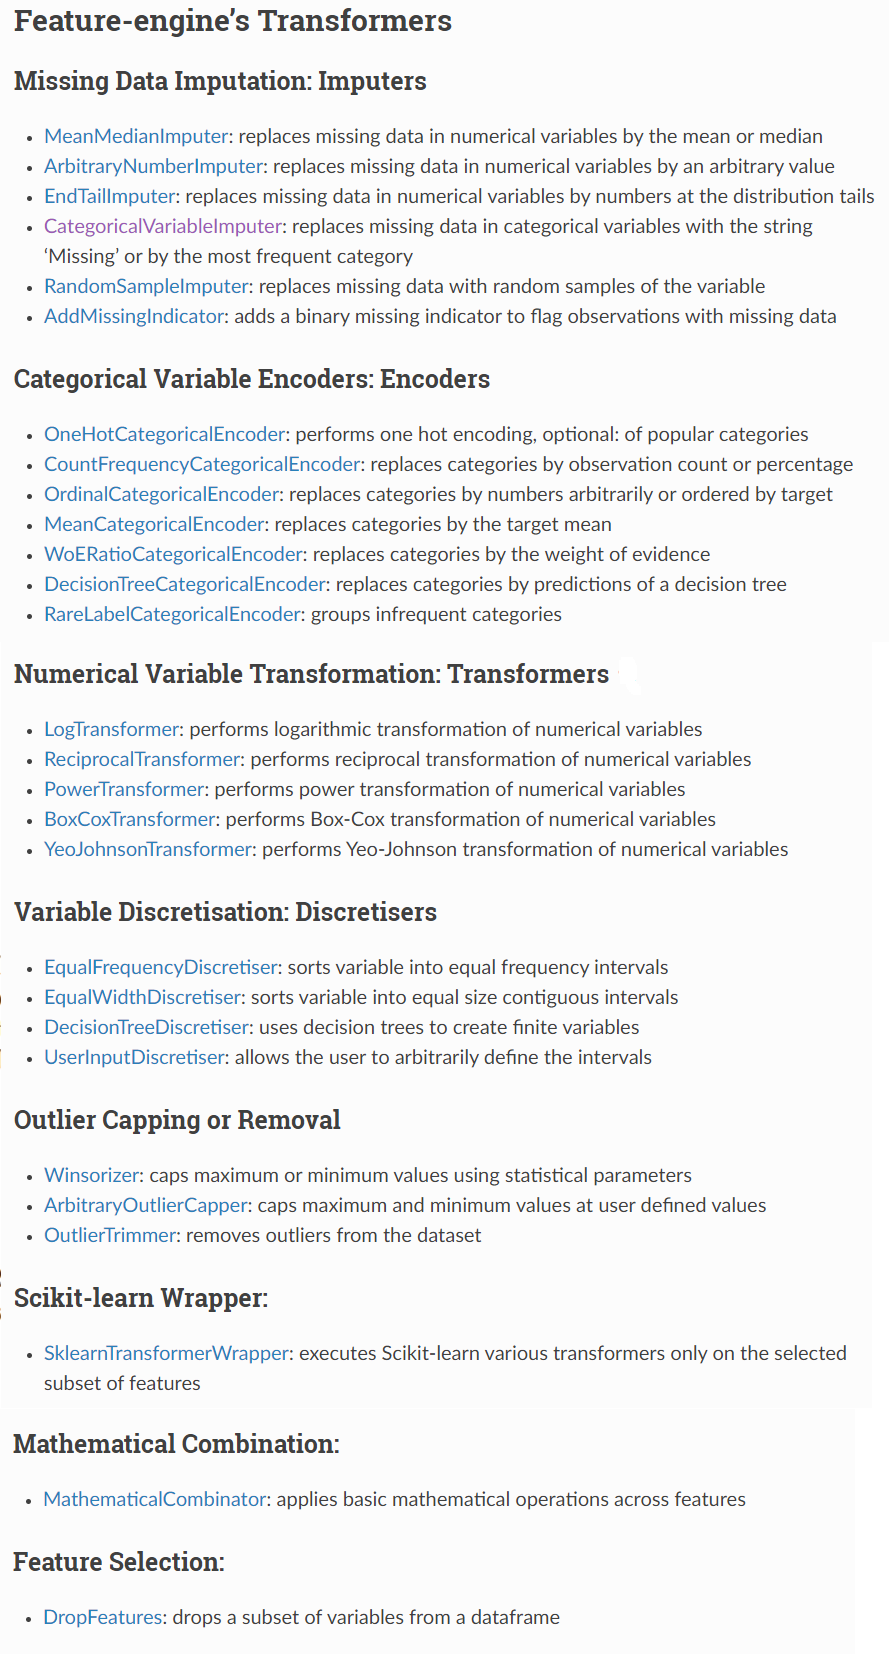

In [267]:
Image("e:/WORK/Python/Raschka/Feature-engine.png", width=700) 